In [56]:
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def random_coordinates(n: int=30, seed:int=None) -> List[Tuple]: 
    if seed:
        np.random.seed(seed)
    X = 2 * np.random.randn(n, 1)
    y = 4 + 3 * X + 2* np.random.randn(n, 1)
    return X, y

def lr(X, y): 
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X) 

    slope = model.coef_[0]
    intercept = model.intercept_
    return y_pred, intercept, slope

def plot_lr(X, y, y_pred, rmsd):
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
    plt.plot(X, y_pred + rmsd, color='orange', label='+ residual stdev', linestyle='dashed')
    plt.plot(X, y_pred - rmsd, color='orange', label='- residual stdev', linestyle='dashed')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Linear Regression Plot')
    plt.legend()
    plt.show()

**p-value**: the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming the null hypothesis is correct. A smaller p-value means there is stronger evidence in favor of the alternative hypothesis

**R-squared**: 
* [source](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/r-squared-or-coefficient-of-determination)
* measures how much prediction error is eliminated when we use least-squares regression
* also called the coefficient of determination 
* Imagine we have points $(x_1, y_1)...(x_n, y_n)$ and we have some line y = mx + b. The squared error of the line is $SE_{line} = (y_1 - (mx_1 + b))^2 + (y_2 - (mx_2 + b))^2 ... + (y_n - (mx_n + b))^2$
* How well does our line fit the data? In other words, how much of the variation in y is described by the variation in x?
    * Total variation in y is the squared difference from central tendency, and the most obvious central tendency is the arithmetic mean: $SE_{\bar{y}} =(y_1 - \bar{y})^2 + ... + (y_n - \bar{y})^2$
    * How much of the total variation is not described by the regression line? This would be the $SE_{line}$ and to get the percentage of the variation that is not described by the variation in x (or by the regression line) is $\frac{SE_{line}}{SE_{\bar{y}}}$
    * Now to answer the initial question (how much of the variation in y is described by the variation in x), we can take the variation not described by the line and subtract from 1 and we get the coefficient of determination $$1 - \frac{SE_{line}}{SE_{\bar{y}}}$$
    * If $SE_{line}$ is small, the line must be a good fit, which means R-squared will be closer to 1--and lots of the variation in y is described by the variation in x

**Root-mean-square-error**
* also known as the root-mean-square error (RMSE) or root-mean-square deviation (RMSD)
* Measures the standard deviation of residuals--the larger RMSE, the more error between linear regression model and actual data points
* See cell below

Linear Regression coefficients: 
	intercept: [4.29079986]
	slope:[2.93686252]


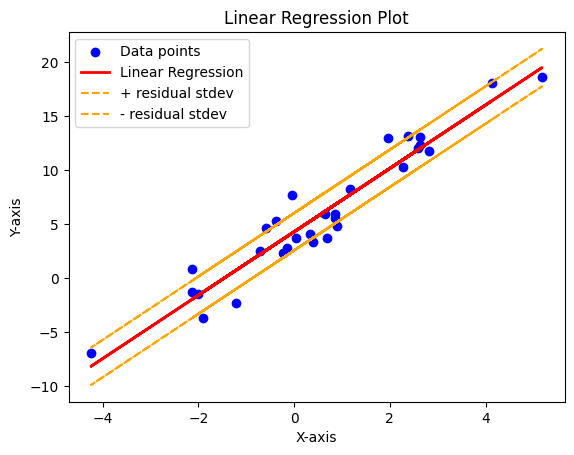

In [58]:
# RMSE or Standard Deviation of Residuals
N = 30
X, y = random_coordinates(n=N)
y_pred, intercept, slope = lr(X, y)
print(f"Linear Regression coefficients: \n\tintercept: {intercept}\n\tslope:{slope}")

residuals = np.array([y - y_hat for y, y_hat in zip(y, y_pred)])

# like a sample standard deviation, we divide by n - 1
mean_of_squared_errors = sum(residuals**2) / (N - 1) 

# the below value is the standard deviation of residuals 
root_mean_square_error = np.sqrt(mean_of_squared_errors)

plot_lr(X, y, y_pred, root_mean_square_error)

**TSS**: Total Sum of Squares, also SST (Sum of Squares Total) is the sum of all squared differences between the mean of a sample and the individual values in that sample $$TSS=\sum_{i=1}^{N}(y_i - \bar{y})^2$$

**RSS**: Residual Sum of Squares measures the discrepancy between data and an estimation model, like linear regression $$RSS = \sum_{i=1}^n(y_i - f(x_i))^2$$

In [17]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [18]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040